### a. Feature Standardization

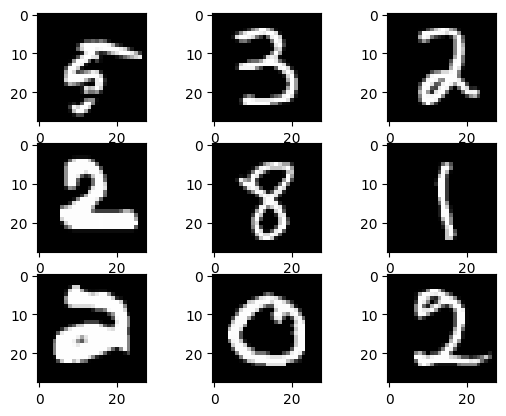

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# fit parameters from data
datagen.fit(X_train)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
  # create a grid of 3x3 images
  for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
  # show the plot
  pyplot.show()
  break

### b. ZCA-Zero Component Analysis Whitening

/Users/sukhmanpreetsingh/anaconda3/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:1047: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn(


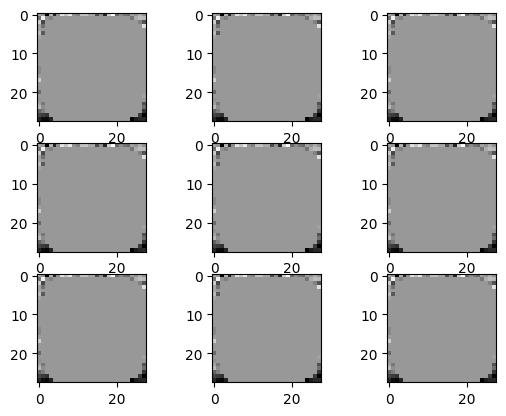

In [3]:
# ZCA whitening
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# define data preparation
datagen = ImageDataGenerator(zca_whitening=True)

# fit parameters from data
datagen.fit(X_train)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
  # create a grid of 3x3 images
  for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
  # show the plot
  pyplot.show()
  break

### c. Random Flips

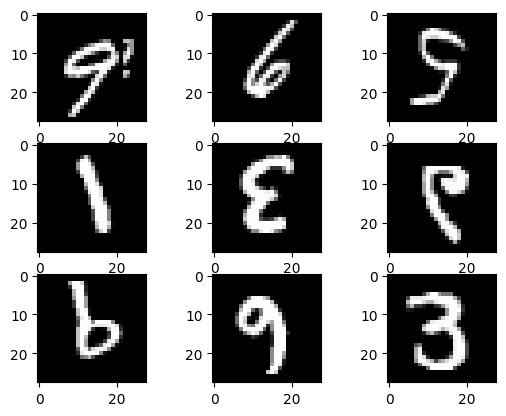

In [4]:
# Random Flips
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# define data preparation
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

# fit parameters from data
datagen.fit(X_train)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
  # create a grid of 3x3 images
  for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
  # show the plot
  pyplot.show()
  break

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
import keras 
from keras.layers import Input, Dense, Reshape, Flatten, Dropout 
from keras.layers import BatchNormalization, Activation, ZeroPadding2D 
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import UpSampling2D, Conv2D
from keras.models import Sequential, Model 
from keras.optimizers import Adam,SGD 

In [9]:
#Loading the CIFAR10 data 
(X, y), (_, _) = keras.datasets.cifar10.load_data() 
  
#Selecting a single class images 
#The number was randomly chosen and any number 
#between 1 to 10 can be chosen 
X = X[y.flatten() == 8] 

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 60s 0us/step


In [10]:
#Defining the Input shape 
image_shape = (32, 32, 3) 
          
latent_dimensions = 100

In [11]:
def build_generator(): 
  
        model = Sequential() 
  
        #Building the input layer 
        model.add(Dense(128 * 8 * 8, activation="relu", 
                        input_dim=latent_dimensions)) 
        model.add(Reshape((8, 8, 128))) 
          
        model.add(UpSampling2D()) 
          
        model.add(Conv2D(128, kernel_size=3, padding="same")) 
        model.add(BatchNormalization(momentum=0.78)) 
        model.add(Activation("relu")) 
          
        model.add(UpSampling2D()) 
          
        model.add(Conv2D(64, kernel_size=3, padding="same")) 
        model.add(BatchNormalization(momentum=0.78)) 
        model.add(Activation("relu")) 
          
        model.add(Conv2D(3, kernel_size=3, padding="same")) 
        model.add(Activation("tanh")) 
  
  
        #Generating the output image 
        noise = Input(shape=(latent_dimensions,)) 
        image = model(noise) 
  
        return Model(noise, image) 

In [12]:
def build_discriminator(): 
  
        #Building the convolutional layers 
        #to classify whether an image is real or fake 
        model = Sequential() 
  
        model.add(Conv2D(32, kernel_size=3, strides=2, 
                         input_shape=image_shape, padding="same")) 
        model.add(LeakyReLU(alpha=0.2)) 
        model.add(Dropout(0.25)) 
          
        model.add(Conv2D(64, kernel_size=3, strides=2, padding="same")) 
        model.add(ZeroPadding2D(padding=((0,1),(0,1)))) 
        model.add(BatchNormalization(momentum=0.82)) 
        model.add(LeakyReLU(alpha=0.25)) 
        model.add(Dropout(0.25)) 
          
        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same")) 
        model.add(BatchNormalization(momentum=0.82)) 
        model.add(LeakyReLU(alpha=0.2)) 
        model.add(Dropout(0.25)) 
          
        model.add(Conv2D(256, kernel_size=3, strides=1, padding="same")) 
        model.add(BatchNormalization(momentum=0.8)) 
        model.add(LeakyReLU(alpha=0.25)) 
        model.add(Dropout(0.25)) 
          
        #Building the output layer 
        model.add(Flatten()) 
        model.add(Dense(1, activation='sigmoid')) 
  
        image = Input(shape=image_shape) 
        validity = model(image) 
  
        return Model(image, validity) 

In [13]:
def display_images(): 
        r, c = 4,4
        noise = np.random.normal(0, 1, (r * c,latent_dimensions)) 
        generated_images = generator.predict(noise) 
  
        #Scaling the generated images 
        generated_images = 0.5 * generated_images + 0.5
  
        fig, axs = plt.subplots(r, c) 
        count = 0
        for i in range(r): 
            for j in range(c): 
                axs[i,j].imshow(generated_images[count, :,:,]) 
                axs[i,j].axis('off') 
                count += 1
        plt.show() 
        plt.close() 

In [14]:
# Building and compiling the discriminator 
discriminator = build_discriminator() 
discriminator.compile(loss='binary_crossentropy', 
                      optimizer=Adam(0.0002,0.5), 
                    metrics=['accuracy']) 
  
#Making the Discriminator untrainable 
#so that the generator can learn from fixed gradient 
discriminator.trainable = False
  
# Building the generator 
generator = build_generator() 
  
#Defining the input for the generator 
#and generating the images 
z = Input(shape=(latent_dimensions,)) 
image = generator(z) 
  
  
#Checking the validity of the generated image 
valid = discriminator(image) 
  
#Defining the combined model of the Generator and the Discriminator 
combined_network = Model(z, valid) 
combined_network.compile(loss='binary_crossentropy', 
                         optimizer=Adam(0.0002,0.5)) 

/Users/sukhmanpreetsingh/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/sukhmanpreetsingh/anaconda3/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/Users/sukhmanpreetsingh/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


/Users/sukhmanpreetsingh/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py:83: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


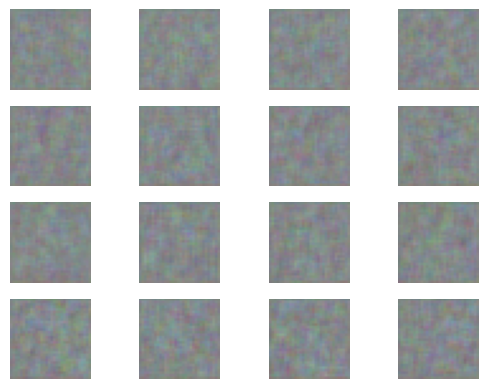

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━

In [ ]:
num_epochs=15000
batch_size=32
display_interval=2500
losses=[] 
  
#Normalizing the input 
X = (X / 127.5) - 1.
          
  
#Defining the Adversarial ground truths 
valid = np.ones((batch_size, 1)) 
  
#Adding some noise  
valid += 0.05 * np.random.random(valid.shape) 
fake = np.zeros((batch_size, 1)) 
fake += 0.05 * np.random.random(fake.shape) 
  
for epoch in range(num_epochs): 
              
            #Training the Discriminator 
              
            #Sampling a random half of images 
            index = np.random.randint(0, X.shape[0], batch_size) 
            images = X[index] 
  
            #Sampling noise and generating a batch of new images 
            noise = np.random.normal(0, 1, (batch_size, latent_dimensions)) 
            generated_images = generator.predict(noise) 
              
  
            #Training the discriminator to detect more accurately 
            #whether a generated image is real or fake 
            discm_loss_real = discriminator.train_on_batch(images, valid) 
            discm_loss_fake = discriminator.train_on_batch(generated_images, fake) 
            discm_loss = 0.5 * np.add(discm_loss_real, discm_loss_fake) 
              
            #Training the Generator 
  
            #Training the generator to generate images 
            #which pass the authenticity test 
            genr_loss = combined_network.train_on_batch(noise, valid) 
              
            #Tracking the progress                 
            if epoch % display_interval == 0: 
                 display_images() 
